## 데이터 불러오기

In [7]:
import pandas as pd

df = pd.read_csv('drug_consumption_replace.csv')
df.head()

,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,39,36,42,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,29,52,55,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,31,45,40,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,34,34,46,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,43,28,43,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [8]:
df = df.replace('CL0', 0).replace('CL1', 1).replace('CL2', 2).replace('CL3', 3).replace('CL4', 4).replace('CL5', 5).replace('CL6', 6)
df

C:\Users\user\AppData\Local\Temp\ipykernel_28188\2261533056.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('CL0', 0).replace('CL1', 1).replace('CL2', 2).replace('CL3', 3).replace('CL4', 4).replace('CL5', 5).replace('CL6', 6)


,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,39,36,42,...,0,0,0,0,0,0,0,2,0,0
1,1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,29,52,55,...,4,0,2,0,2,3,0,4,0,0
2,2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,31,45,40,...,0,0,0,0,0,0,1,0,0,0
3,3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,34,34,46,...,0,0,2,0,0,0,0,2,0,0
4,4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,43,28,43,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,25,51,57,...,0,0,0,3,3,0,0,0,0,5
1881,1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,33,51,50,...,2,0,0,3,5,4,4,5,0,0
1882,1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,47,30,37,...,4,0,2,0,2,0,2,6,0,0
1883,1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,45,26,48,...,3,0,0,3,3,0,3,4,0,0


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


# 데이터 전처리 (스케일링)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Z-score를 기반으로 이상치 확인
z_scores = np.abs((df_scaled - df_scaled.mean()) / df_scaled.std())
outliers = df[z_scores.max(axis=1) > 3]  # Z-score가 3을 넘어가는 경우 이상치로 판단

# 이상치 출력
print("Outliers:")
outliers

# 이상치 제거
# df_cleaned = df.drop(outliers.index)

# 클러스터링을 위한 데이터셋 준비
# df_cleaned를 이용하여 클러스터링을 진행하면 됩니다.

Outliers:


,Unnamed: 0,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
13,13,14,1.82213,0.48246,-0.05921,0.24923,-0.31685,28,45,46,...,0,0,0,0,0,0,0,1,0,0
19,19,20,0.49788,-0.48246,-0.05921,0.96082,-0.31685,32,27,29,...,1,0,0,0,0,6,0,1,0,0
23,23,24,1.09449,-0.48246,-1.73790,0.96082,-0.31685,51,16,37,...,0,1,0,0,1,0,0,6,0,1
26,26,27,1.82213,0.48246,-1.22751,0.24923,-0.31685,35,28,24,...,0,0,0,0,0,0,0,6,0,0
29,29,30,1.09449,-0.48246,1.98437,0.96082,-0.31685,24,51,52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1871,1875,-0.95197,-0.48246,-1.22751,-0.57009,-0.31685,46,37,55,...,3,6,3,5,3,3,0,6,0,6
1877,1877,1881,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,50,26,42,...,2,5,0,2,0,6,0,6,0,2
1878,1878,1882,-0.95197,-0.48246,0.45468,0.24923,-0.31685,35,27,52,...,0,0,0,2,0,0,2,2,0,0
1880,1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,25,51,57,...,0,0,0,3,3,0,0,0,0,5


In [10]:
df.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Gender', 'Education', 'Country',
       'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff',
       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [11]:
df = df.drop(['Unnamed: 0', 'ID', 'Age', 'Country', 'Education', 'Ethnicity'], axis=1)
df.head()

,Gender,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.48246,39,36,42,37,42,-0.21712,-1.18084,5,2,...,0,0,0,0,0,0,0,2,0,0
1,-0.48246,29,52,55,48,41,-0.71126,-0.21575,5,2,...,4,0,2,0,2,3,0,4,0,0
2,-0.48246,31,45,40,32,34,-1.37983,0.40148,6,0,...,0,0,0,0,0,0,1,0,0,0
3,0.48246,34,34,46,47,46,-1.37983,-1.18084,4,0,...,0,0,2,0,0,0,0,2,0,0
4,0.48246,43,28,43,41,50,-0.21712,-0.21575,4,1,...,1,0,0,1,0,0,2,2,0,0


## 데이터 전처리
- df_features에 성격 검사 점수를 넣고, df_labels에 각 마약 종류의 소비 빈도를 넣음

In [12]:
df_features = df[['Gender', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Nscore', 'Impulsive', 'SS']]
df_labels = df[['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legalh', 'LSD', 'Meth', 'Semer', 'VSA', 'Nicotine', 'Mushrooms', 'Caff']]

In [ ]:
# 마약 종류를 분류
stimulants = ['Amphet', 'Coke', 'Crack', 'Meth']
psychedelics = ['LSD', 'Ecstasy']
depressants = ['Benzos', 'Heroin', 'Ketamine']
others = ['Amyl', 'Cannabis', 'Legalh', 'Semer', 'VSA']

# 열 이름을 4가지 마약 종류로 변경
df_labels.columns = ['Stimulants' if col in stimulants else 
                     'Psychedelics' if col in psychedelics else 
                     'Depressants' if col in depressants else 
                     'Others' if col in others else col for col in df_labels.columns]

In [224]:
df_labels = df_cleaned

## 클러스터링(마약 종류 군집화)

In [225]:
df_transposed = df_labels.transpose()

# 결과 출력
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,1870,1872,1873,1874,1875,1876,1879,1881,1883,1884
Amphet,2,2,0,0,1,0,0,0,0,1,...,3,6,3,0,0,0,3,0,0,3
Amyl,0,2,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Benzos,2,0,0,3,0,0,0,0,0,1,...,0,0,4,6,0,0,3,0,0,3
Cannabis,0,4,3,2,3,0,1,0,0,1,...,5,6,6,3,5,6,6,3,6,3
Coke,0,3,0,2,0,0,0,0,0,0,...,0,0,3,1,0,4,0,0,0,3
Crack,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Ecstasy,0,4,0,0,1,0,0,0,0,0,...,3,2,3,0,5,3,5,2,3,3
Heroin,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,0,0
Ketamine,0,2,0,2,0,0,0,0,0,0,...,0,2,0,0,0,3,0,0,0,0
Legalh,0,0,0,0,1,0,0,0,0,0,...,0,2,5,0,2,5,4,3,3,3


In [226]:
# 각 행을 기준으로 묶기
rows_zipped = [tuple(row) for row in df_transposed.values]

# 결과 출력
print(rows_zipped)

[(2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 3, 2, 2, 1, 5,

In [227]:
rows_zipped

[(2,
  2,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  2,
  0,
  1,
  2,
  1,
  0,
  0,
  2,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  2,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  2,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  2,
  3,
  0,
  1,
  0,
  0,
  0,
  0,
  3,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  4,
  0,
  3,
  0,
  0,
  2,
  0,
  0,
  1,
  0,
  0,
  0,


### 1. Hierarchical Clustering
#### 1) scipy

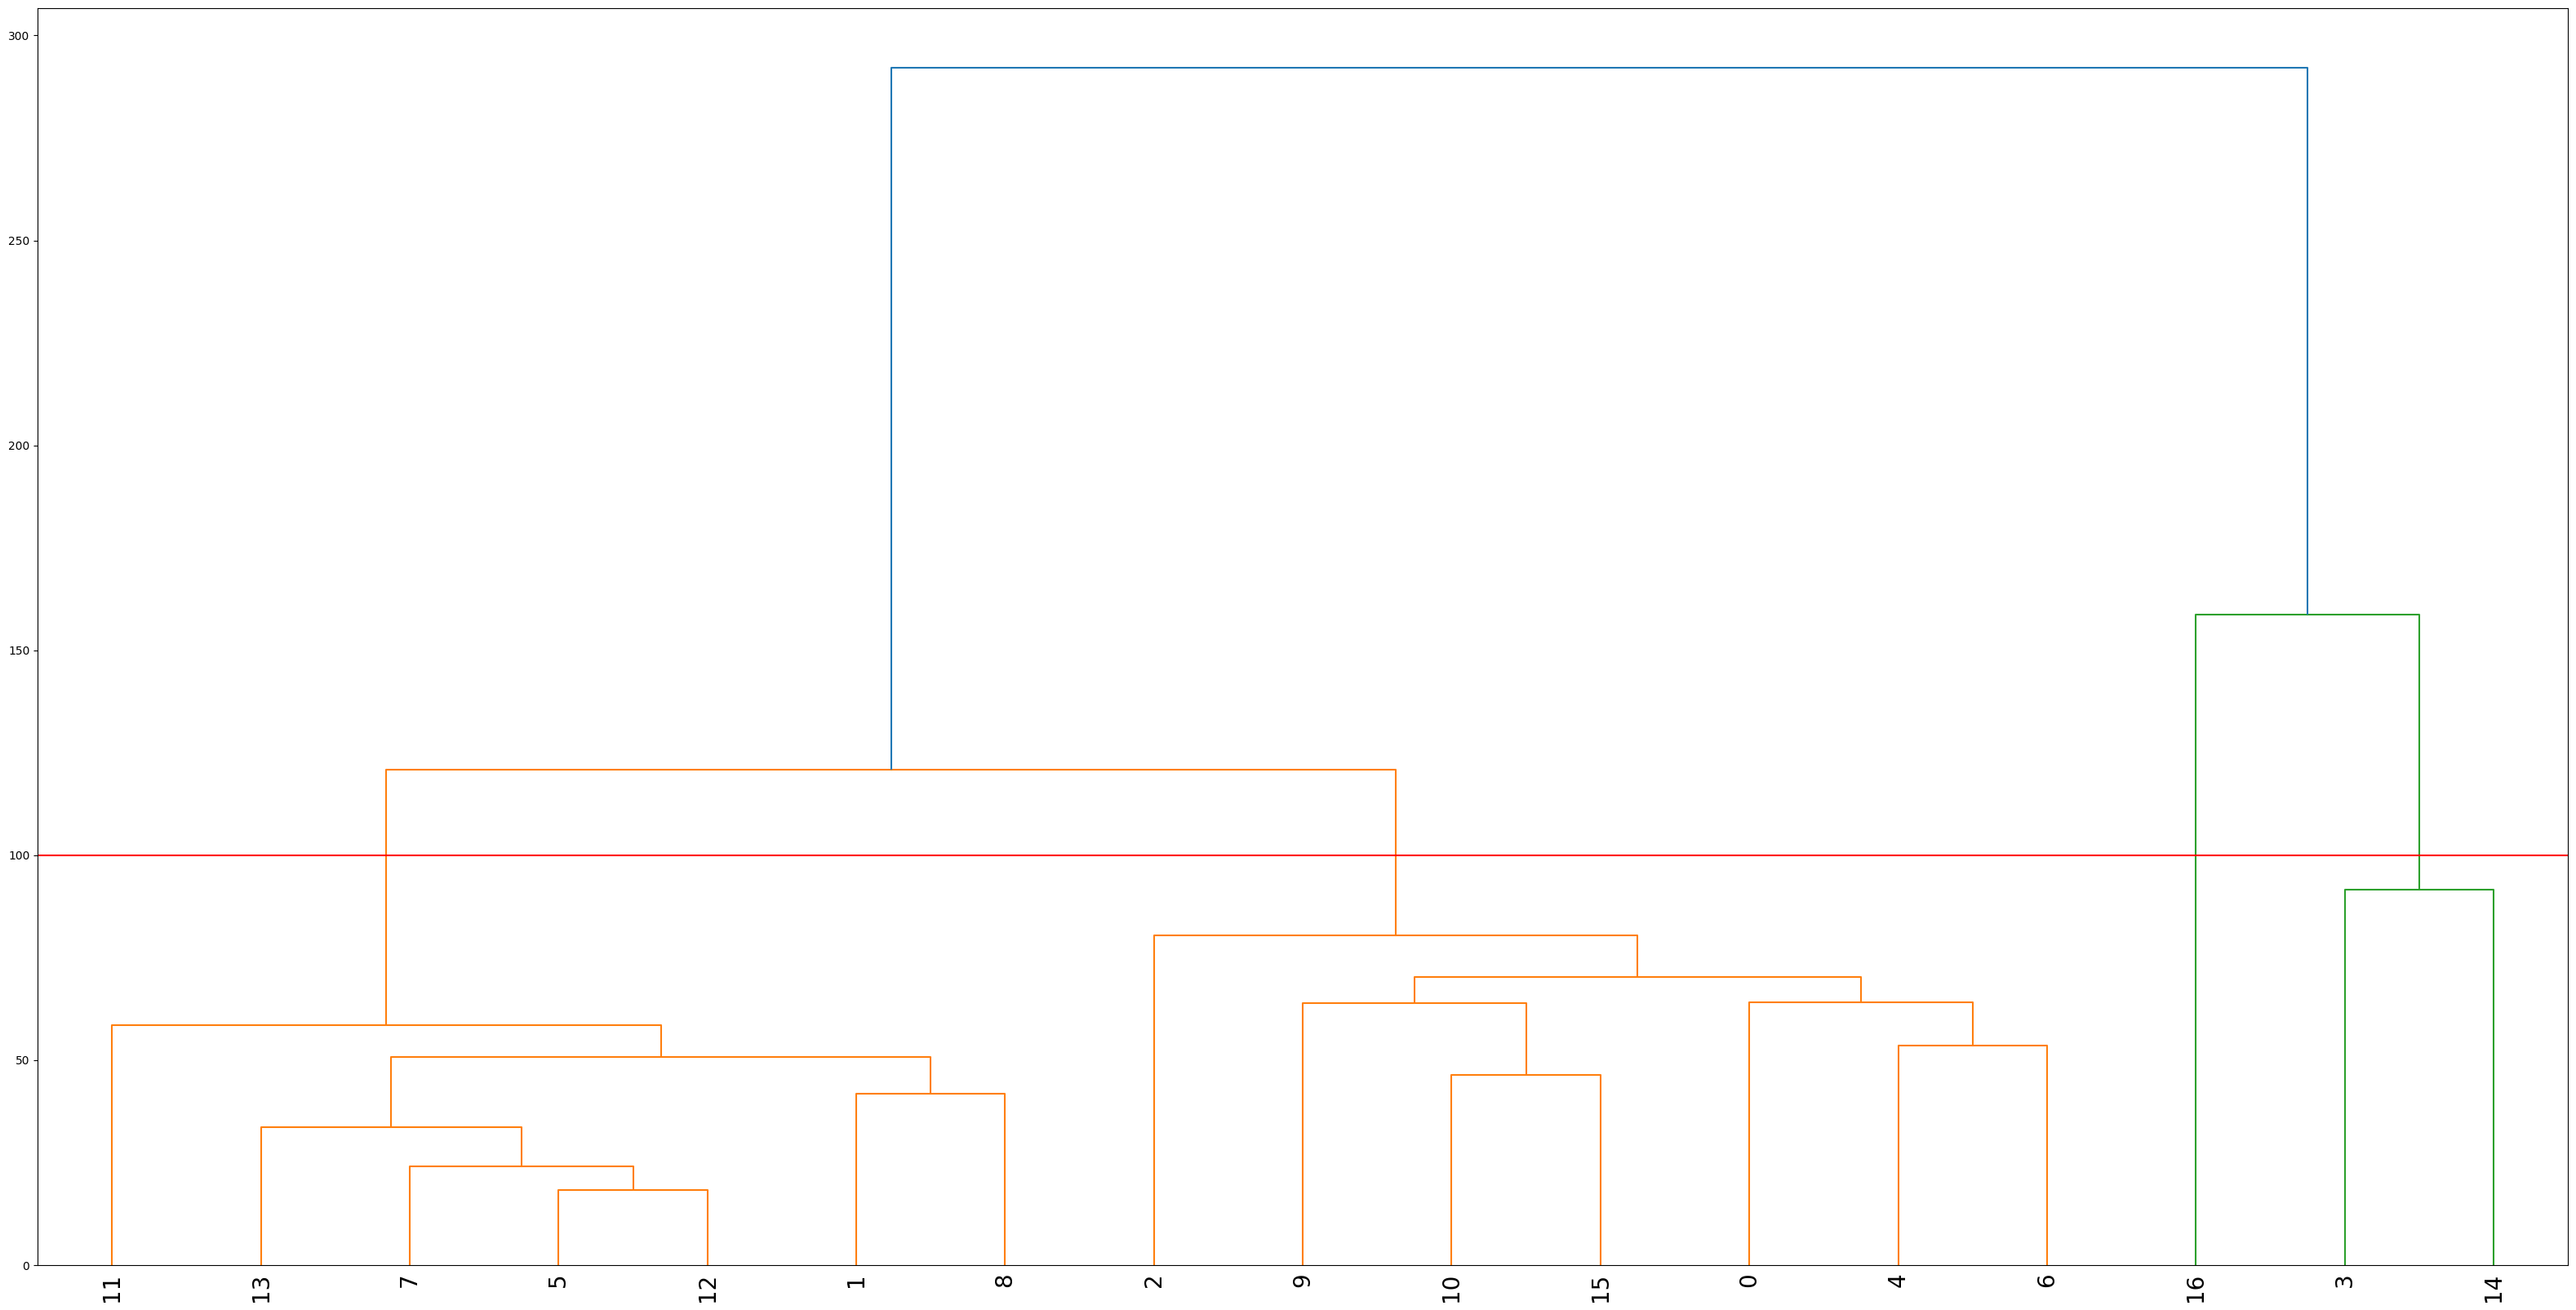

In [242]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(rows_zipped, method='ward') 

plt.figure(figsize=(40, 20))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20
           )
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.show()

#### 2) sklearn

In [244]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# 계층적 클러스터링 수행
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical.fit(rows_zipped)

# 클러스터링 결과 출력
print("Clustering labels:", hierarchical.labels_)

# 클러스터 개수 확인
print("Number of clusters:", len(set(hierarchical.labels_)))

Clustering labels: [1 3 1 0 1 3 1 3 3 1 1 3 3 3 0 1 2]
Number of clusters: 4


### 2. K-means Clustering

In [230]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rows_zipped)

# 클러스터링 결과 출력
print("Clustering labels:", kmeans.labels_)

# 클러스터 개수 확인
print("Number of clusters:", len(set(kmeans.labels_)))

Clustering labels: [0 2 2 3 2 2 0 2 2 0 0 2 2 2 3 0 1]
Number of clusters: 4


### 3. DBSCAN

In [231]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(rows_zipped)

# 클러스터링 결과 출력
print("Clustering labels:", dbscan.labels_)

# 클러스터 개수 확인
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters:", num_clusters)

Clustering labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of clusters: 0


### 4. OPTICS

In [232]:
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# OPTICS 클러스터링 수행
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics.fit(rows_zipped)

# 클러스터링 결과 출력
print("Clustering labels:", optics.labels_)

# 클러스터 개수 확인
num_clusters = len(set(optics.labels_)) - (1 if -1 in optics.labels_ else 0)
print("Number of clusters:", num_clusters)

Clustering labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of clusters: 1


In [233]:
# 데이터프레임을 CSV 파일로 저장
csv_filename = 'clustered_drug_data.csv'
df.to_csv(csv_filename, index=False)

## 데이터 정규화

In [ ]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 9.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/10.6 MB 11.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.3/10.6 MB 12.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/10.6 MB 11.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 11.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 11.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/10.6 MB 11.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 11.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 11.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 11.4 MB/s eta 0:00:01


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Perform standardization on the features
df_features_scaled = scaler.fit_transform(df_features)

# Convert scaled features back to DataFrame for better readability
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)

# Display first few rows of scaled features
df_features_scaled.head()

,Escore,Oscore,Ascore,Cscore,Nscore
0,-0.528234,-0.571966,-0.911428,0.080816,0.337059
1,1.835144,1.404350,0.797602,-0.062764,-0.757818
2,0.801166,-0.876015,-1.688260,-1.067821,-0.538842
3,-0.823656,0.036131,0.642236,0.655134,-0.210379
4,-1.709922,-0.419942,-0.289962,1.229453,0.775010


In [ ]:
df_labels

,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Nicotine,Semer,VSA
0,2,0,2,0,0,0,0,0,0,0,0,0,2,0,0
1,2,2,0,4,3,0,4,0,2,0,2,3,4,0,0
2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
3,0,0,3,2,2,0,0,0,2,0,0,0,2,0,0
4,1,1,0,3,0,0,1,0,0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,0,0,5,0,0,0,0,0,3,3,0,0,0,5
1881,0,0,0,3,0,0,2,0,0,3,5,4,5,0,0
1882,6,5,5,6,4,0,4,0,2,0,2,0,6,0,0
1883,0,0,0,6,0,0,3,0,0,3,3,0,4,0,0


In [ ]:
import pandas as pd


# 열 이름 변경
df.rename(columns={'Heroin' : 'Depressant', 'Cannabis' : 'Depressant', 'Benzos' : 'Depressant', 'Coke' : 'Stimulant', 'Meth' : 'Stimulant', 'Nicotine' : 'Stimulant', 'Amphet' : 'Stimulant', 'Crack' : 'Stimulant', 'LSD' : 'Hallucinogen',
 'Ketamine' : 'Hallucinogen', 'Ecstasy' : 'Hallucinogen', 'Legalh' : 'Hallucinogen', 'Amyl' : 'Hallucinogen', 'VSA' : 'Hallucinogen', 'Semer' : 'None'}, inplace=True)

# 변경된 데이터프레임 확인
df

,Country,Nscore,Escore,Oscore,Ascore,Cscore,Alcohol,Stimulant,Hallucinogen,Depressant,...,Hallucinogen,Depressant,Hallucinogen,Hallucinogen,Hallucinogen,Stimulant,Mushrooms,Stimulant,None,Hallucinogen
0,0.96082,39,36,42,37,42,5,2,0,2,...,0,0,0,0,0,0,0,2,0,0
1,0.96082,29,52,55,48,41,5,2,2,0,...,4,0,2,0,2,3,0,4,0,0
2,0.96082,31,45,40,32,34,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.96082,34,34,46,47,46,4,0,0,3,...,0,0,2,0,0,0,0,2,0,0
4,0.96082,43,28,43,41,50,4,1,1,0,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.57009,25,51,57,48,33,5,0,0,0,...,0,0,0,3,3,0,0,0,0,5
1881,-0.57009,33,51,50,48,30,5,0,0,0,...,2,0,0,3,5,4,4,5,0,0
1882,-0.57009,47,30,37,31,31,4,6,5,5,...,4,0,2,0,2,0,2,6,0,0
1883,-0.57009,45,26,48,32,22,5,0,0,0,...,3,0,0,3,3,0,3,4,0,0


### 학습 데이터, 테스트 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
import random
import numpy as np

# 랜덤 시드 설정
np.random.seed(42)
random.seed(42)

# 데이터를 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_labels, test_size=0.2, random_state=42)

# 이후에도 같은 분할을 유지하려면 random_state를 고정합니다 (여기서는 42로 설정)

In [ ]:
y_test

,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Nicotine,Semer,VSA
307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
462,2,2,3,3,0,0,2,0,0,2,3,3,6,0,0
1741,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
917,4,2,3,6,5,0,5,5,4,3,5,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
1623,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0
1370,3,3,3,6,4,6,4,3,3,3,3,3,6,0,0
1761,4,1,4,5,3,4,2,4,0,3,1,6,1,0,1


## 1. 모델 학습
### 1) Neural Net 모델 예측

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier

## 지금 최종최종최종
mlp_clf_tuned = MLPClassifier(
    activation = 'relu',
    solver = 'adam',
    hidden_layer_sizes = (50,),
    alpha = 0.06357208758199738,
    random_state=42
)

# MultiOutputClassifier로 MLPClassifier 래핑
multi_model = MultiOutputClassifier(mlp_clf_tuned)

# 모델 학습
multi_model.fit(X_train, y_train)

# 예측 수행
y_pred_multi_mlp = multi_model.predict(X_test)

# 결과 저장을 위한 딕셔너리 초기화
multioutput_results_mlp_tuned = {}

# Numpy 배열로 변환
y_test_np = y_test.values
y_pred_multi_mlp_np = y_pred_multi_mlp

# 각 레이블에 대한 지표 계산 후 평균 취하기
accuracy_avg_mlp_tuned = np.mean([accuracy_score(y_test_np[:, i], y_pred_multi_mlp_np[:, i])
                                  for i in range(y_test_np.shape[1])])
f1_avg_mlp_tuned = np.mean([f1_score(y_test_np[:, i], y_pred_multi_mlp_np[:, i], average='weighted')
                            for i in range(y_test_np.shape[1])])
recall_avg_mlp_tuned = np.mean([recall_score(y_test_np[:, i], y_pred_multi_mlp_np[:, i], average='weighted')
                                for i in range(y_test_np.shape[1])])
precision_avg_mlp_tuned = np.mean([precision_score(y_test_np[:, i], y_pred_multi_mlp_np[:, i], average='weighted')
                                   for i in range(y_test_np.shape[1])])

# 결과 저장
multioutput_results_mlp_tuned['MLPClassifier'] = {
    'Accuracy': accuracy_avg_mlp_tuned,
    'F1 Score': f1_avg_mlp_tuned,
    'Recall': recall_avg_mlp_tuned,
    'Precision': precision_avg_mlp_tuned
}

print("Tuned MLPClassifier Multi-output Classification Results:")
print(multioutput_results_mlp_tuned)

C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Tuned MLPClassifier Multi-output Classification Results:
{'MLPClassifier': {'Accuracy': 0.6564102564102563, 'F1 Score': 0.5591086464680097, 'Recall': 0.6564102564102563, 'Precision': 0.5050095924986735}}


C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alsgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

In [ ]:
pred_result = pd.DataFrame(y_pred_multi_mlp_np, columns = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legalh', 'LSD', 'Meth', 'Nicotine', 'Semer', 'VSA'])
pred_result

,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Nicotine,Semer,VSA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,6,3,0,3,0,0,3,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
374,0,0,0,2,0,0,0,0,0,0,0,0,6,0,0
375,0,0,0,6,0,0,0,0,0,0,0,0,6,0,0


### 점수 높은 상위 3개 마약 출력

In [ ]:
selected_columns_per_row = []

for index, row in pred_result.iterrows():
    selected_columns = row.index[row.ge(5)].tolist()
    selected_columns_per_row.append(selected_columns)

selected_columns_per_row = pd.DataFrame(selected_columns_per_row)
selected_columns_per_row

,0,1,2
0,None,None,None
1,None,None,None
2,Cannabis,Nicotine,None
3,None,None,None
4,Cannabis,Nicotine,None
...,...,...,...
372,None,None,None
373,None,None,None
374,Nicotine,None,None
375,Cannabis,Nicotine,None
